Import Librarys

In [28]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Load The CSVs to DFs

In [29]:
penguindf = pd.read_csv('penguins.csv')
abalonedf = pd.read_csv('abalone.csv')
display(abalonedf)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11
...,...,...,...,...,...,...,...,...,...
4172,F,0.570,0.450,0.150,0.9645,0.5310,0.1890,0.2090,9
4173,F,0.645,0.535,0.190,1.2395,0.4680,0.2385,0.4240,10
4174,M,0.695,0.550,0.195,1.6645,0.7270,0.3600,0.4450,11
4175,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11


1 Hot Vector Penguins DF

In [30]:
penguin_columns_to_encode = ['island','sex']
penguindf_encoded = pd.get_dummies(penguindf, columns=penguin_columns_to_encode, drop_first=True, dtype='float')
display(penguindf_encoded)


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,Adelie,39.1,18.7,181,3750,0.0,1.0,1.0
1,Adelie,39.5,17.4,186,3800,0.0,1.0,0.0
2,Adelie,40.3,18.0,195,3250,0.0,1.0,0.0
3,Adelie,36.7,19.3,193,3450,0.0,1.0,0.0
4,Adelie,39.3,20.6,190,3650,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214,4925,0.0,0.0,0.0
329,Gentoo,46.8,14.3,215,4850,0.0,0.0,0.0
330,Gentoo,50.4,15.7,222,5750,0.0,0.0,1.0
331,Gentoo,45.2,14.8,212,5200,0.0,0.0,0.0


Plot Points on pie chart to check distribution


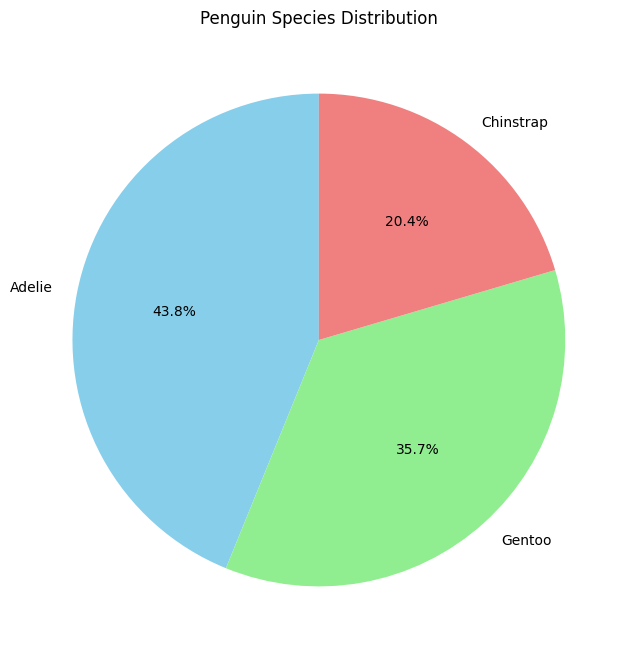

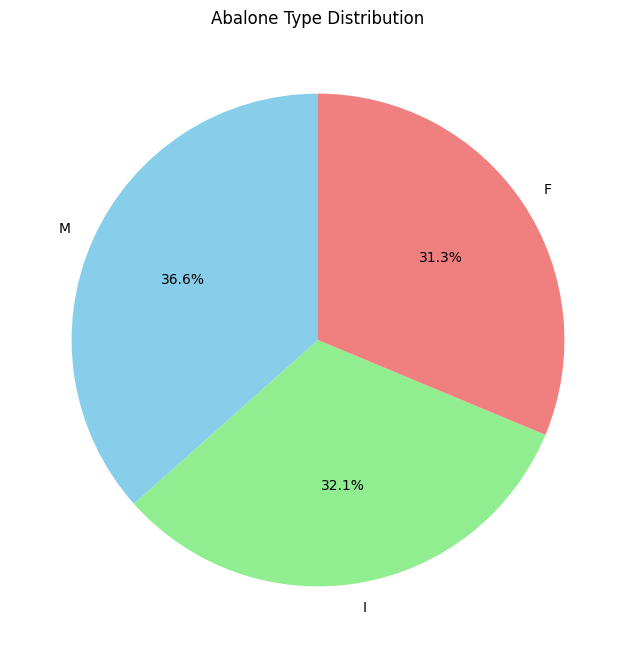

In [31]:
penguin_species_count = penguindf['species'].value_counts() # count the number of each species
abalone_type_count = abalonedf['Type'].value_counts() # count the number of each type


plt.figure(figsize=(8, 8))
plt.pie(penguin_species_count, labels=penguin_species_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Penguin Species Distribution')
plt.figure(figsize=(8, 8))
plt.pie(abalone_type_count, labels=abalone_type_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Abalone Type Distribution')
plt.show()

Split data for training

In [32]:
X_penguin = penguindf_encoded.drop('species', axis=1)
y_penguin = penguindf_encoded['species']
print(X_penguin)
penguin_training_set = sklearn.model_selection.train_test_split(X_penguin,y_penguin)
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = penguin_training_set

X_abalone = abalonedf.drop('Type', axis=1)
y_abalone = abalonedf['Type']

abalone_training_set = sklearn.model_selection.train_test_split(X_abalone,y_abalone)
X_abalone_train, X_abalone_test, y_abalone_train, y_abalone_test = abalone_training_set

Base Decision Tree

In [34]:
classifier = DecisionTreeClassifier()
classifier.fit(X_penguin_train, y_penguin_train)
y_penguin_pred = classifier.predict(X_penguin_test)
penguin_accuracy = accuracy_score(y_penguin_test, y_penguin_pred)
print("Penguin Accuracy: ", penguin_accuracy)

Penguin Accuracy:  1.0
